<a href="https://colab.research.google.com/github/amf599-cyber/CMD_LAB7-8/blob/main/LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# all imports needed for Lab + any of the utilities found on CMD website (data.py, test.py,...)
!pip install optuna==2.4.0

import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import optuna
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import time, sys, os


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.7/282.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.3/154.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.8 MB/s eta 0:00:00


In [2]:
file_path = '/content/Maps_Mtot_Nbody_SIMBA_LH_z=0.00.npy'
maps = np.load(file_path)

fparams = '/content/params_LH_Nbody_SIMBA.txt'
params  = np.loadtxt(fparams)

In [3]:
print(maps.shape)
print(params.shape)

(15000, 256, 256)
(1000, 6)


In [4]:
maps[0]

array([[1.09371264e+09, 1.22212198e+09, 1.13053107e+09, ...,
        1.17134374e+09, 1.07001830e+09, 1.06335763e+09],
       [1.24508646e+09, 1.32995366e+09, 1.07178349e+09, ...,
        1.17478669e+09, 1.03778125e+09, 1.04176832e+09],
       [1.07094323e+09, 1.11148352e+09, 9.76883520e+08, ...,
        1.01710835e+09, 9.91514048e+08, 9.92976768e+08],
       ...,
       [1.22124339e+09, 1.21259494e+09, 1.41664934e+09, ...,
        1.24355059e+09, 1.16757248e+09, 1.27812032e+09],
       [1.11312064e+09, 1.02777056e+09, 1.10511590e+09, ...,
        1.00175686e+09, 1.29677888e+09, 1.49132454e+09],
       [1.01376448e+09, 1.08540275e+09, 1.29405824e+09, ...,
        1.10220979e+09, 1.15410534e+09, 1.13466458e+09]], dtype=float32)

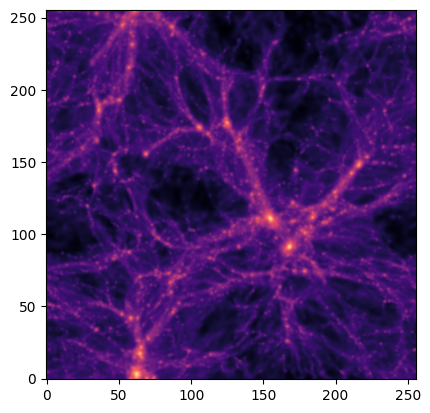

Value of the parameters for map #0
Omega_m: 0.14620
sigma_8: 0.62420
A_SN1:   2.87986
A_AGN1:  0.57995
A_SN2:   0.91447
A_AGN2:  0.69786


In [5]:
# setting map number, indexed 0-14999, 15000 maps to 1000 params = map_number//15 to index param data from .txt file
map_number = 0
params_map = params[map_number//15]

plt.imshow(np.log10(maps[map_number]),cmap=plt.get_cmap('magma'), origin='lower', interpolation='bicubic')
plt.show()

print('Value of the parameters for map #%d' % map_number)
print('Omega_m: %.5f'%params_map[0])
print('sigma_8: %.5f'%params_map[1])
print('A_SN1:   %.5f'%params_map[2])
print('A_AGN1:  %.5f'%params_map[3])
print('A_SN2:   %.5f'%params_map[4])
print('A_AGN2:  %.5f'%params_map[5])

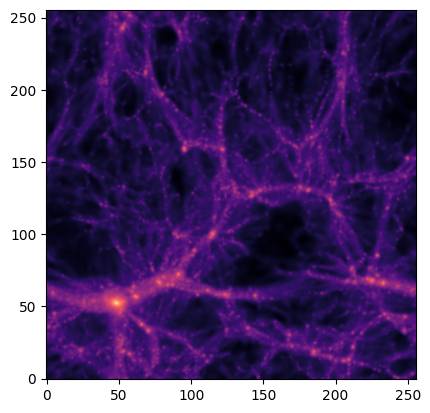

Value of the parameters for map #14999
Omega_m: 0.14620
sigma_8: 0.62420
A_SN1:   2.87986
A_AGN1:  0.57995
A_SN2:   0.91447
A_AGN2:  0.69786


In [6]:
map_number2 = 14999
params_map2 = params[map_number2//15]

plt.imshow(np.log10(maps[map_number2]),cmap=plt.get_cmap('magma'), origin='lower', interpolation='bicubic')
plt.show()

print('Value of the parameters for map #%d' % map_number2)
print('Omega_m: %.5f'%params_map[0])
print('sigma_8: %.5f'%params_map[1])
print('A_SN1:   %.5f'%params_map[2])
print('A_AGN1:  %.5f'%params_map[3])
print('A_SN2:   %.5f'%params_map[4])
print('A_AGN2:  %.5f'%params_map[5])

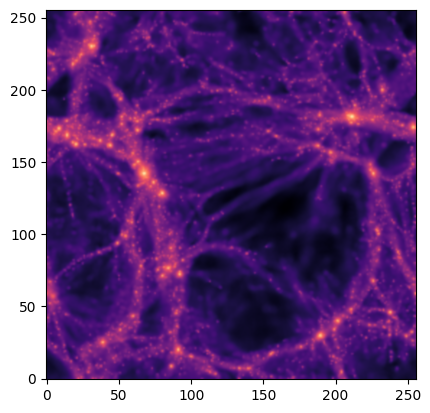

Value of the parameters for map #8625
Omega_m: 0.31380
sigma_8: 0.98140
A_SN1:   0.55633
A_AGN1:  0.28519
A_SN2:   0.59419
A_AGN2:  0.86274


In [7]:
# randomizer for previewing
import random
map_number_rand = random.randint(0,14999)
params_map_rand = params[map_number_rand//15]

plt.imshow(np.log10(maps[map_number_rand]),cmap=plt.get_cmap('magma'), origin='lower', interpolation='bicubic')
plt.show()

print('Value of the parameters for map #%d' % map_number_rand)
print('Omega_m: %.5f'%params_map_rand[0])
print('sigma_8: %.5f'%params_map_rand[1])
print('A_SN1:   %.5f'%params_map_rand[2])
print('A_AGN1:  %.5f'%params_map_rand[3])
print('A_SN2:   %.5f'%params_map_rand[4])
print('A_AGN2:  %.5f'%params_map_rand[5])

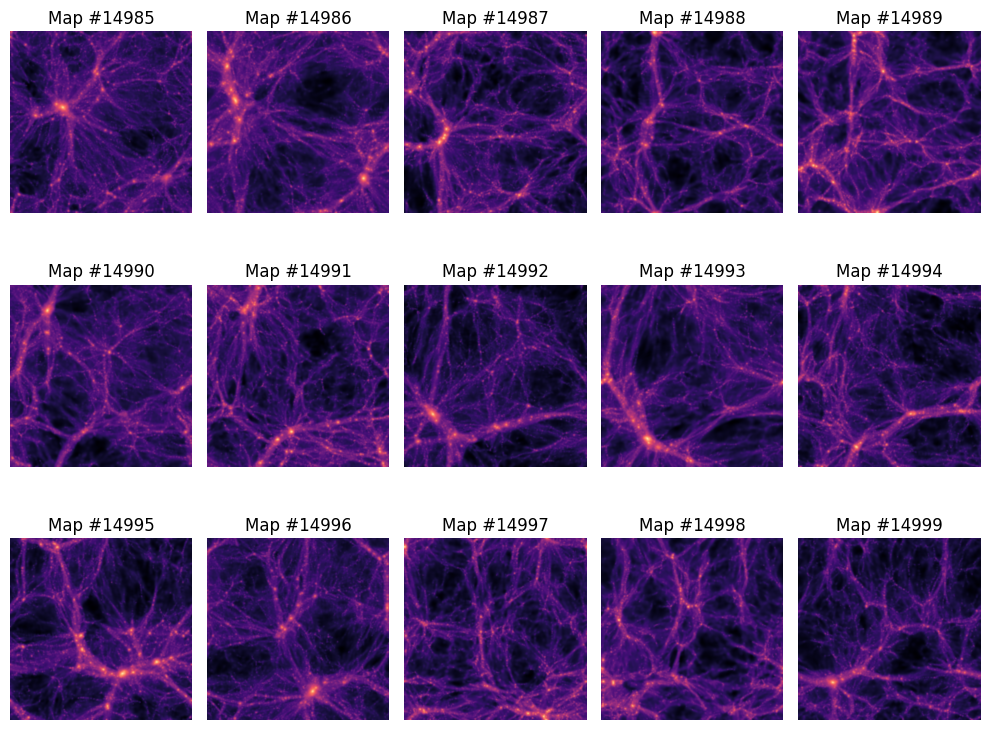

Value of the parameters for maps #14985 to #14999
Omega_m: 0.14620
sigma_8: 0.62420
A_SN1:   2.87986
A_AGN1:  0.57995
A_SN2:   0.91447
A_AGN2:  0.69786


In [23]:
# Testing to see properties of consecutive sets of 15 maps
# Create a figure and a set of subplots for 15 maps (3 rows, 5 columns)
fig, axes = plt.subplots(3, 5, figsize=(10, 8))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i in range(15):
    # n can be 0 up to 999
    n = 999
    # add a multiple of 15 to index a different matching set of params
    map_number_test = i + n * 15
    # The parameters are associated with every 15 maps, so for maps 0-14, it's params[0]
    params_map_test = params[map_number_test // 15]

    # Plot the map in the current subplot
    ax = axes[i]
    im = ax.imshow(np.log10(maps[map_number_test]), cmap=plt.get_cmap('magma'), origin='lower', interpolation='bicubic')
    ax.set_title(f'Map #{map_number_test}')
    ax.axis('off') # Hide axes ticks and labels for cleaner display

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()

# Print the parameters for this set of 15 maps (which all share params[0])
# Since map_number_test // 15 will be 0 for all maps from 0 to 14, params_map_test is params[0]
print(f'Value of the parameters for maps #{map_number_test-14} to #{map_number_test}')
print('Omega_m: %.5f'%params[0][0])
print('sigma_8: %.5f'%params[0][1])
print('A_SN1:   %.5f'%params[0][2])
print('A_AGN1:  %.5f'%params[0][3])
print('A_SN2:   %.5f'%params[0][4])
print('A_AGN2:  %.5f'%params[0][5])